In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

# Rutherfordstreuung

Die für ein Teilchen im Zentralpotential zugehörige Lagrange-Funktion lautet in kartesischen Koordinaten:

$$
\mathcal{L}(x,y,\dot x,\dot y) = \frac{m}{2} (\dot x^2+\dot y^2) - \frac{K}{\sqrt{x^2+y^2}} \, ,
$$
wobei $K$ die auf dem Übungsblatt angegebene Konstante ist. 
Die Euler-Lagrange Gleichungen ergeben nun die folgenden zwei Bewegungsgleichungen (überprüfen Sie dies zum Training):

$$
\ddot x = \frac{K}{m} \frac{x}{(x^2+y^2)^{3/2}}\\
\ddot y = \frac{K}{m} \frac{y}{(x^2+y^2)^{3/2}}
$$

Analog zu früheren Aufgaben (siehe Jupyter-Notebook `AM_EX5.ipynb` von vergangener Woche) schreiben wir die Bewegungsgleichungen in ein System von DGL erster Ordnung um:

\begin{align}
\dot x &= v_x\\
\dot y &= v_y\\
\dot v_x &= \ddot x = \frac{K}{m} \frac{x}{(x^2+y^2)^{3/2}}\\
\dot v_y &= \ddot y = \frac{K}{m} \frac{y}{(x^2+y^2)^{3/2}}
\end{align}

Diese DGL werden nun numerisch gelöst. Das Vorgehen ist dabei analog zum Vorgehen im Notebook `AM_EX5.ipynb`: zunächst implementieren wir die entsprechenden Ableitungen und benutzen dann die von Python zur Verfügung gestellte `odeint`-Methode.

## Ableitungen

Der Zustand `state` des Systems soll wie folgt parametrisiert werden

`state[0]` $\hat{=}\,x$\, `state[1]` $\hat{=}\,v_x$\, ....

Implementiere nun die Ableitungen (`derivs`) wie folgt

`dydx[0]` $\hat{=}\,\dot x $\, `dydx[1]` $\hat{=}\,\dot v_x$\, ....


In [3]:
def derivs(state,t):
    dydx = np.zeros_like(state) 
    dydx[0] = state[1]
    dydx[1] = K/m*(state[0]/(state[0]**2+state[2]**2)**(3/2))
    dydx[2] = state[3]
    dydx[3] = K/m*(state[2]/(state[0]**2+state[2]**2)**(3/2))
    return dydx

# Numerische Lösung

In [4]:
# Globale Konstanten
# Beachte: wir setzen hier sowohl die Konstante K=1, als auch die Masse der alpha-Teilchen m=1;
# d.h., wir arbeiten in einem künstlichen Einheitensystem, in dem diese Konstanten diese Zahlenwerte annehmen.
# Dies ist für die numerische Berechnung vorteilhaft. Um mit Experimenten vergleichen zu können, müssen wir aber
# am Ende der Rechnung daran denken, die Ergebnisse in die üblichen SI-Einheiten zurück zu rechnen.
K = 1
m = 1

## Eine Einzelne Trajektorie
Zunächst berechnen und visualisieren wir die Trajektorie eines einzelnen $\alpha$-Teilchens. Entspricht das numerische Ergebnis dem analytisch erhaltenen Resultat?

In [41]:
# Die Teilchen sollen 'von links' aus dem Unendlichen einlaufen,
x0  = -10
vx0 = 10
y0  = 0.1
vy0 = 0

In [42]:
# Anfangsbedingungen zusammenfassen und numerisch lösen
state0 = [x0,vx0,y0,vy0]
dt = 0.001 

t = np.arange(0.0, 10, dt) 
n_trj = integrate.odeint(derivs, state0, t) 

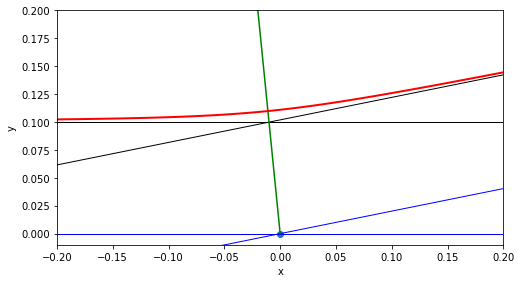

In [43]:
# Wir brauchen die Trajektorien 'im Unendlichen', diese approximieren wir durch die jeweils ersten bzw. 
# letzen Punkte der erstellten Trajektorie
delx_incoming = n_trj[1,0] - n_trj[0,0]
dely_incoming = n_trj[1,2] - n_trj[0,2]
delx_outgoing = n_trj[-2,0] - n_trj[-1,0]
dely_outgoing = n_trj[-2,2] - n_trj[-1,2]

# Plotte die Trajektorie, sowie einige Hilfslinien
fig,ax = plt.subplots(figsize = (8,8))

# Parameter für die Hilfslinien
kwargs_l1 = {'c' : 'black','lw' : 1}
kwargs_l2 = {'c' : 'b','lw' : 1}

# Plot Hilfslinien
## Einlaufendes Teilchen
ax.plot([n_trj[0,0],n_trj[0,0] + 10000 * delx_incoming],
        [n_trj[0,2],n_trj[0,2] + 10000 * dely_incoming],**kwargs_l1)
ax.plot([-10, 10000 * delx_incoming],
        [0,0],**kwargs_l2)

## Auslaufendes Teilchen
ax.plot([n_trj[-1,0],n_trj[-1,0] + 10000 * delx_outgoing],
        [n_trj[-1,2],n_trj[-1,2] + 10000 * dely_outgoing],**kwargs_l1)
ax.plot([-100 * delx_outgoing,100 * delx_outgoing],
        [-100*dely_outgoing,100 * dely_outgoing],**kwargs_l2)

# Plotten der Symmetrieachse
# Evt. nicht die eleganteste Methode - vielleicht fällt Ihnen hier etwas besseres ein?
p1 = np.array([-delx_incoming,-dely_incoming])
p2 = np.array([-delx_outgoing,-dely_outgoing])
phi = (np.pi - np.arccos((p1[0]*p2[0]+p1[1]*p2[1]) / np.linalg.norm(p1) / np.linalg.norm(p2)))
ax.plot([0,10*np.cos(np.pi - (np.pi - phi)/2)],[0,10*np.sin(np.pi - (np.pi - phi)/2)],c = 'g')

# Ursprung und Teilchentrajektorie
ax.plot(n_trj[...,0],n_trj[...,2],lw = 2,c = 'r')
ax.scatter(0,0)

# Plot Einstellungen
lims = 0.2
ax.set_xlim(-lims,lims)
ax.set_ylim(-0.01,lims)
ax.set_aspect(1)
ax.set_xlabel("x")
ax.set_ylabel("y")

plt.show()

## Mehrere Trajektorien
Nachdem wir uns davon überzeugt haben, dass die numerische Rechnung tatsächlich wie gewünscht eine Hyperbelbahn ergibt, können wir nun systematisch die Trajektorien vieler $\alpha$-Teilchen simulieren, die alle mit unterschiedlichem Streuparameter $b$ einfallen.

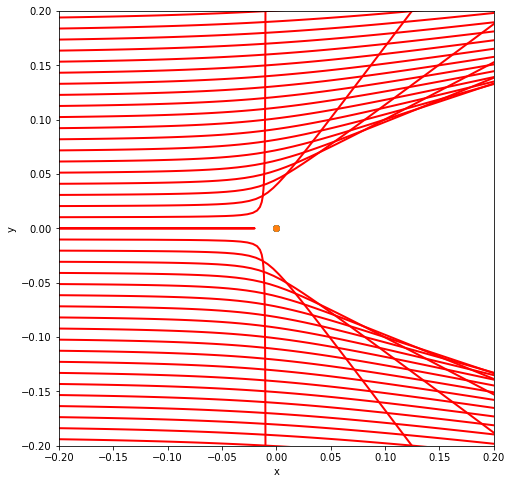

In [63]:
# Wiederhole die Berechnung der Trajektorie für verschiedene Werte des Streuparameters b.
# Der Streuparameter entspricht hier y0 und sollte in einer Schleife durchlaufen werden.
# Dazu müssen Sie den minimalen Wert, den maximalen Wert, und die Schrittweite festlegen.
# Beachten Sie, dass eine zu klein gewählte Schrittweite zu langer Rechenzeit führen kann.
# Bei zu grober Wahl der Schrittweite laufen Sie Gefahr, das typische Verhalten nicht sehen zu können.
# Schätzen Sie daher zunächst ab, welche Werte vernünftig sind und passen Sie diese ggf. in einem 2. Durchlauf an,
# falls der Ergebnisplot nicht aussagekräftig ist.
x0 = -10
vx0 = 10
y0 = None
vy0 = 0
state0 = [x0,vx0,y0,vy0]

# Zeitschritte
dt = 0.001 
t = np.arange(0.0, 10, dt) 

# Schleife über div. impact parameter + Plot
fig,ax = plt.subplots(figsize = (8,8))

bs = np.linspace(-0.2,0.2,41)

for b in bs:
    state0[2] = b
    n_trj = integrate.odeint(derivs, state0, t) 
    ax.plot(n_trj[...,0],n_trj[...,2],lw = 2,c = 'r')
    ax.scatter(0,0)

    
# Plotte Ursprung
ax.scatter(0,0)

# Ein paar Plot Einstellungen
lims = 0.2
ax.set_xlim(-lims,lims)
ax.set_ylim(-lims,lims)
ax.set_aspect(1)
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.show()


## Histogram
Nun kommen wir zur eigentlichen Aufgabenstellung in HA 6.3b), bei der wir überprüfen wollen, ob das Rutherford'sche Streugesetz aus HA 6.3a) in dieser Simulation realisiert ist. Dies kann man dadurch erreichen, dass man die Streuwinkel in kleine "Bins" aufteilt und zählt, wie viele der Trajektorien in einem dieser Bins landen. Die Zahl der so erhaltenen Streuereignisse pro Bin wird dann als Funktion des Streuwinkels geplottet. Können Sie das analytisch vorhergesagte $1/\sin^4 \theta$-Verhalten bestätigen?

In [69]:
# Wiederholen des obigen Vorgehens, aber ohne den Plot zu erstellen, da dies lange dauert.
# Die Berechnung des Streuwinkels kann von oben übernommen werden.
# Die berechneten Winkel können dann zum Beispiel in eine Liste gefüllt werden, z.B.
# mithilfe der append-Funktion (Bsp.: liste_winkel.append(phi), wobei phi der berechnete Winkel ist)

x0 = -10
vx0 = 10
y0 = None
vy0 = 0
state0 = [x0,vx0,y0,vy0]

# Zeitschritte
dt = 0.001 
t = np.arange(0.0, 10, dt) 

angles = []

# Schleife über div. impact parameter + Plot


bs = np.linspace(-0.2,0.2,100)

for b in bs:
    state0[2] = b
    n_trj = integrate.odeint(derivs, state0, t) 
    delx_incoming = n_trj[1,0] - n_trj[0,0]
    dely_incoming = n_trj[1,2] - n_trj[0,2]
    delx_outgoing = n_trj[-2,0] - n_trj[-1,0]
    dely_outgoing = n_trj[-2,2] - n_trj[-1,2]
    p1 = np.array([-delx_incoming,-dely_incoming])
    p2 = np.array([-delx_outgoing,-dely_outgoing])
    phi = (np.pi - np.arccos((p1[0]*p2[0]+p1[1]*p2[1]) / np.linalg.norm(p1) / np.linalg.norm(p2)))
    angles.append(phi)
 


(array([36., 16., 10.,  6.,  6.,  2.,  4.,  2.,  2.,  0.,  2.,  2.,  0.,
         0.,  2.,  0.,  0.,  2.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,
         0.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([0.09980712, 0.15266156, 0.205516  , 0.25837044, 0.31122488,
        0.36407932, 0.41693376, 0.4697882 , 0.52264264, 0.57549708,
        0.62835152, 0.68120596, 0.7340604 , 0.78691484, 0.83976928,
        0.89262372, 0.94547816, 0.9983326 , 1.05118705, 1.10404149,
        1.15689593, 1.20975037, 1.26260481, 1.31545925, 1.36831369,
        1.42116813, 1.47402257, 1.52687701, 1.57973145, 1.63258589,
        1.68544033, 1.73829477, 1.79114921, 1.84400365, 1.89685809,
        1.94971253, 2.00256697, 2.05542141, 2.10827586, 2.1611303 ,
        2.21398474, 2.26683918, 2.31969362, 2.37254806, 2.4254025 ,
        2.47825694, 2.53111138, 2.58396582, 2.63682026, 2.6896747 ,
        2.74252914]),
 <a list of 50

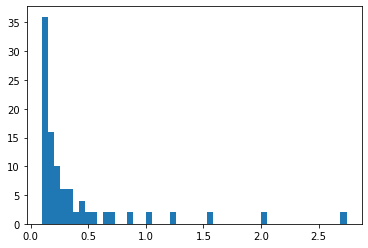

In [70]:
# Eine Liste lässt sich einfach als Histogramm plotten, indem man in plt.hist(liste,bins=N) die Liste mit den
# Daten und die Anzahl der gewünschten Bins eingibt. Dabei wird automatisch der Wertebereich bestimmt,
# den die Daten in der Liste einnehmen, und gleichmäßig in N gleich große Abschnitte unterteilt.
# Bsp.: die Ergebnisse streuen, liegen aber im Intervall [-10,10]. Es sollen N=100 Bins erstellt werden.
# Dann wird das Intervall in 100 gleich große Abschnitte unterteilt und automatisch gezählt, wie viele 
# Datenpunkte in jedem Abschnitt liegen. Das Ergebnis wird dann als Histogrammplot dargestellt.
plt.hist(angles,bins=50)

# Abschätzung der Größe des Kernradius

Nun wollen wir die Fragestellung in HA6.3c) bearbeiten. Dazu müssen wir uns zunächst überlegen, wie wir die Größe des Kernradius abschätzen können. Laut Aufgabenstellung sollen Sie dazu die Trajektorie identifizieren, bei der der Streuwinkel $\pi/2$ ist. 
Der Grund für diese Abschätzung kommt vom Streuverhalten von harten Kugeln aneinander, das in der Vorlesung behandelt wurde, siehe VL7_Folien.pdf Seite 7.12: dort wird die Beziehung $\theta = \pi - 2 \arcsin(b/R_2)$ hergeleitet, wobei $b$ der Streuparameter und $R_2$ der Radius der großen Kugel ist, den wir hier suchen. Wie Sie leicht nachrechnen können, ist bei $\theta = \pi/2$ der Radius der Kugel $R_2 = \sqrt{2}b$, so dass wir den Streuparameter bei diesem Streuwinkel zur Abschätzung der Größe des Kernradius nehmen können, wenn wir so tun, als ob der Kern und das $\alpha$-Teilchen jeweils harte Kugeln wären. 

Beachte, dass bei der Streuung im Zentralpotential das Ergebnis von der Energie der gestreuten Teilchen abhängt. Dies können Sie sehen, indem Sie die Geschwindigkeit und/oder die Masse der einfallenden Teilchen variieren und erneut den Kernradius abschätzen. Genaugenommen muss man also sagen "der Kernradius ist so-und-so-groß, wenn ich ihn mit $\alpha$-Teilchen einer Energie $E=...$ abschätze".

Im wesentlichen ist für diese Analyse bereits alles vorhanden. Finden Sie nun diejenige Trajektorie, bei der der Streuparameter $b$ zum Streuwinkel $\pi/2$ führt. Die Trajektorie kann dazu wie oben numerisch bestimmt werden.

Wie sehr unterscheidet sich in diesem Fall der Streuparameter $b$ vom minimalen Abstand der Hyperbel zum Streuzentrum? Dazu muss noch der minimale Abstand zum Urpsrung bestimmt werden. 

Beachten Sie dazu, dass `n_trj` numpy arrays sind, bei denen dies sehr einfach möglich ist. Der kleinste Eintrag eines numpy arrays lässt sich zum Beispiel durch `nparray.min()` bestimmen.

Zum Schluss müssen Sie nun diesen Zahlenwert noch in Metern umrechnen. Macht die von Ihnen erhaltene Größenordnung für den Kernradius Sinn?

In [ ]:
# Bestimmung des Wertes des Streuparameters b, der zum Streuwinkel pi/2 führt; kann auch mit obigem Code 
# durchgeführt werden. Was ist bei diesem Wert von b der minimale Abstand der Trajektorie zum Streuzentrum?
# Ist dieser Wert vergleichbar zu b?
# Nicht vergessen, das erhaltene Ergebnis für den Kernradius noch in SI-Einheiten umzurechnen!
???